In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = "./data/"
file = os.path.join(path, "heart_attack_prediction_indonesia.csv")
df = pd.read_csv(file)

In [4]:
df.head () .T

,0,1,2,3,4
age,60,53,62,73,52
gender,Male,Female,Female,Male,Male
region,Rural,Urban,Urban,Urban,Urban
income_level,Middle,Low,Low,Low,Middle
hypertension,0,0,0,1,1
diabetes,1,0,0,0,0
cholesterol_level,211,208,231,202,232
obesity,0,0,1,0,0
waist_circumference,83,106,112,82,89
family_history,0,1,1,1,0


In [5]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

In [6]:
Missing_value = df.isna().sum()
print(Missing_value)

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


karena ada 94848 yang hilang dari alkohol, mari di cek apa aja dan di mana aja

In [7]:
df['alcohol_consumption'].unique()

array([nan, 'Moderate', 'High'], dtype=object)

Count of missing alcohol_consumption: 94848
Count of non-missing alcohol_consumption: 63507
Group summary (missing vs non-missing alcohol_consumption):
                   age        income_level hypertension  diabetes  \
                  mean median     <lambda>         mean      mean   
alc_missing                                                         
False        54.489505   54.0       Middle     0.301258  0.200498   
True         54.580118   55.0       Middle     0.297602  0.199340   

            cholesterol_level heart_attack  
                         mean         mean  
alc_missing                                 
False              199.731982     0.405010  
True               199.400209     0.398322  


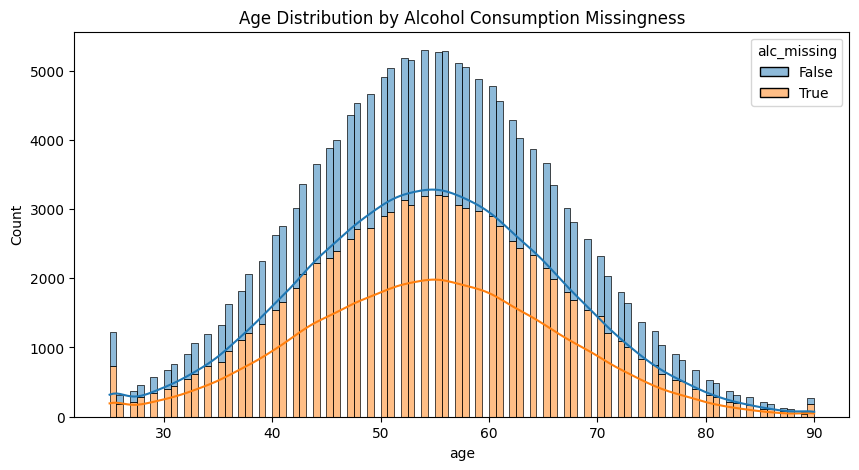

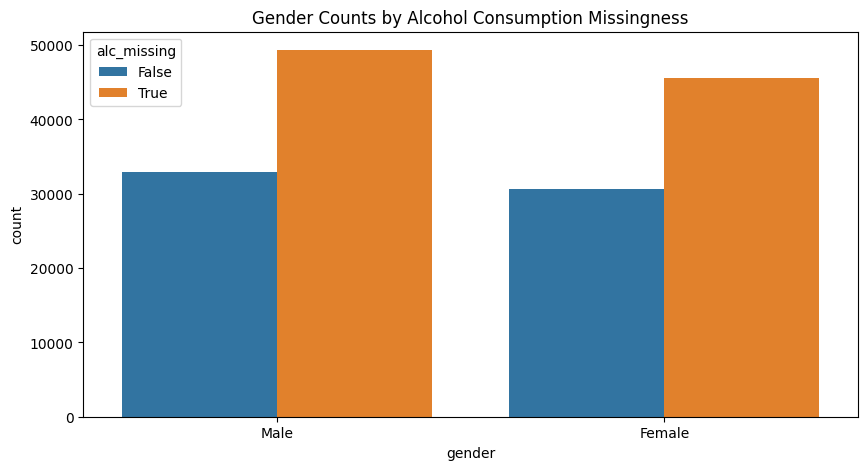

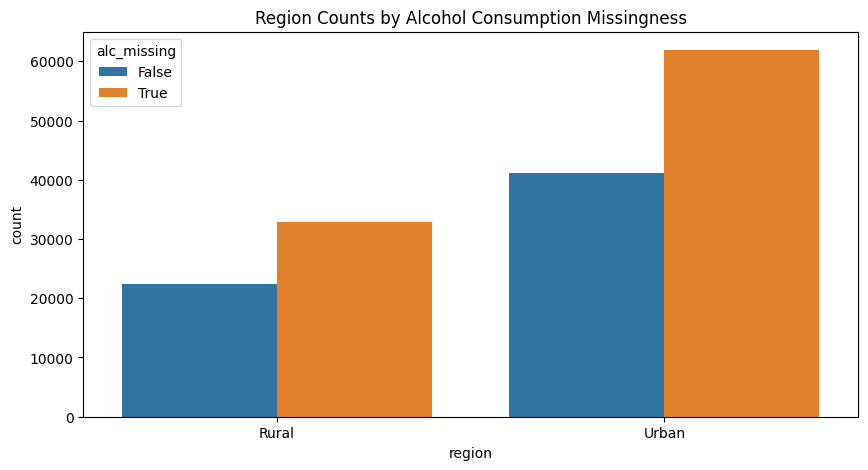

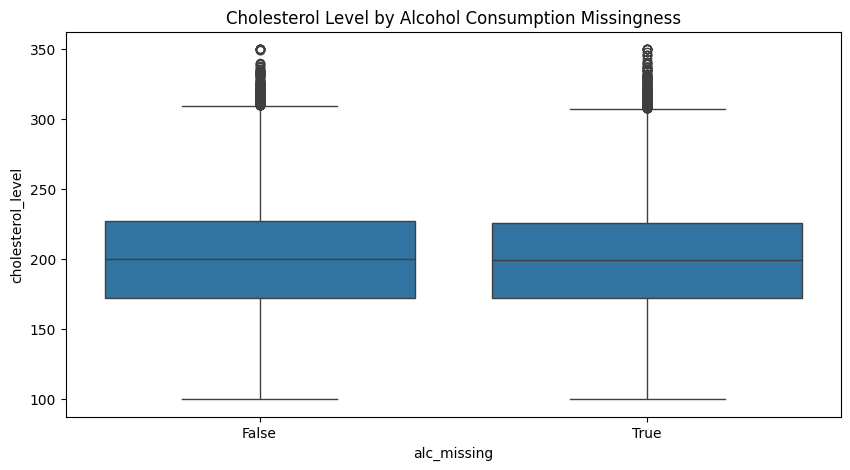

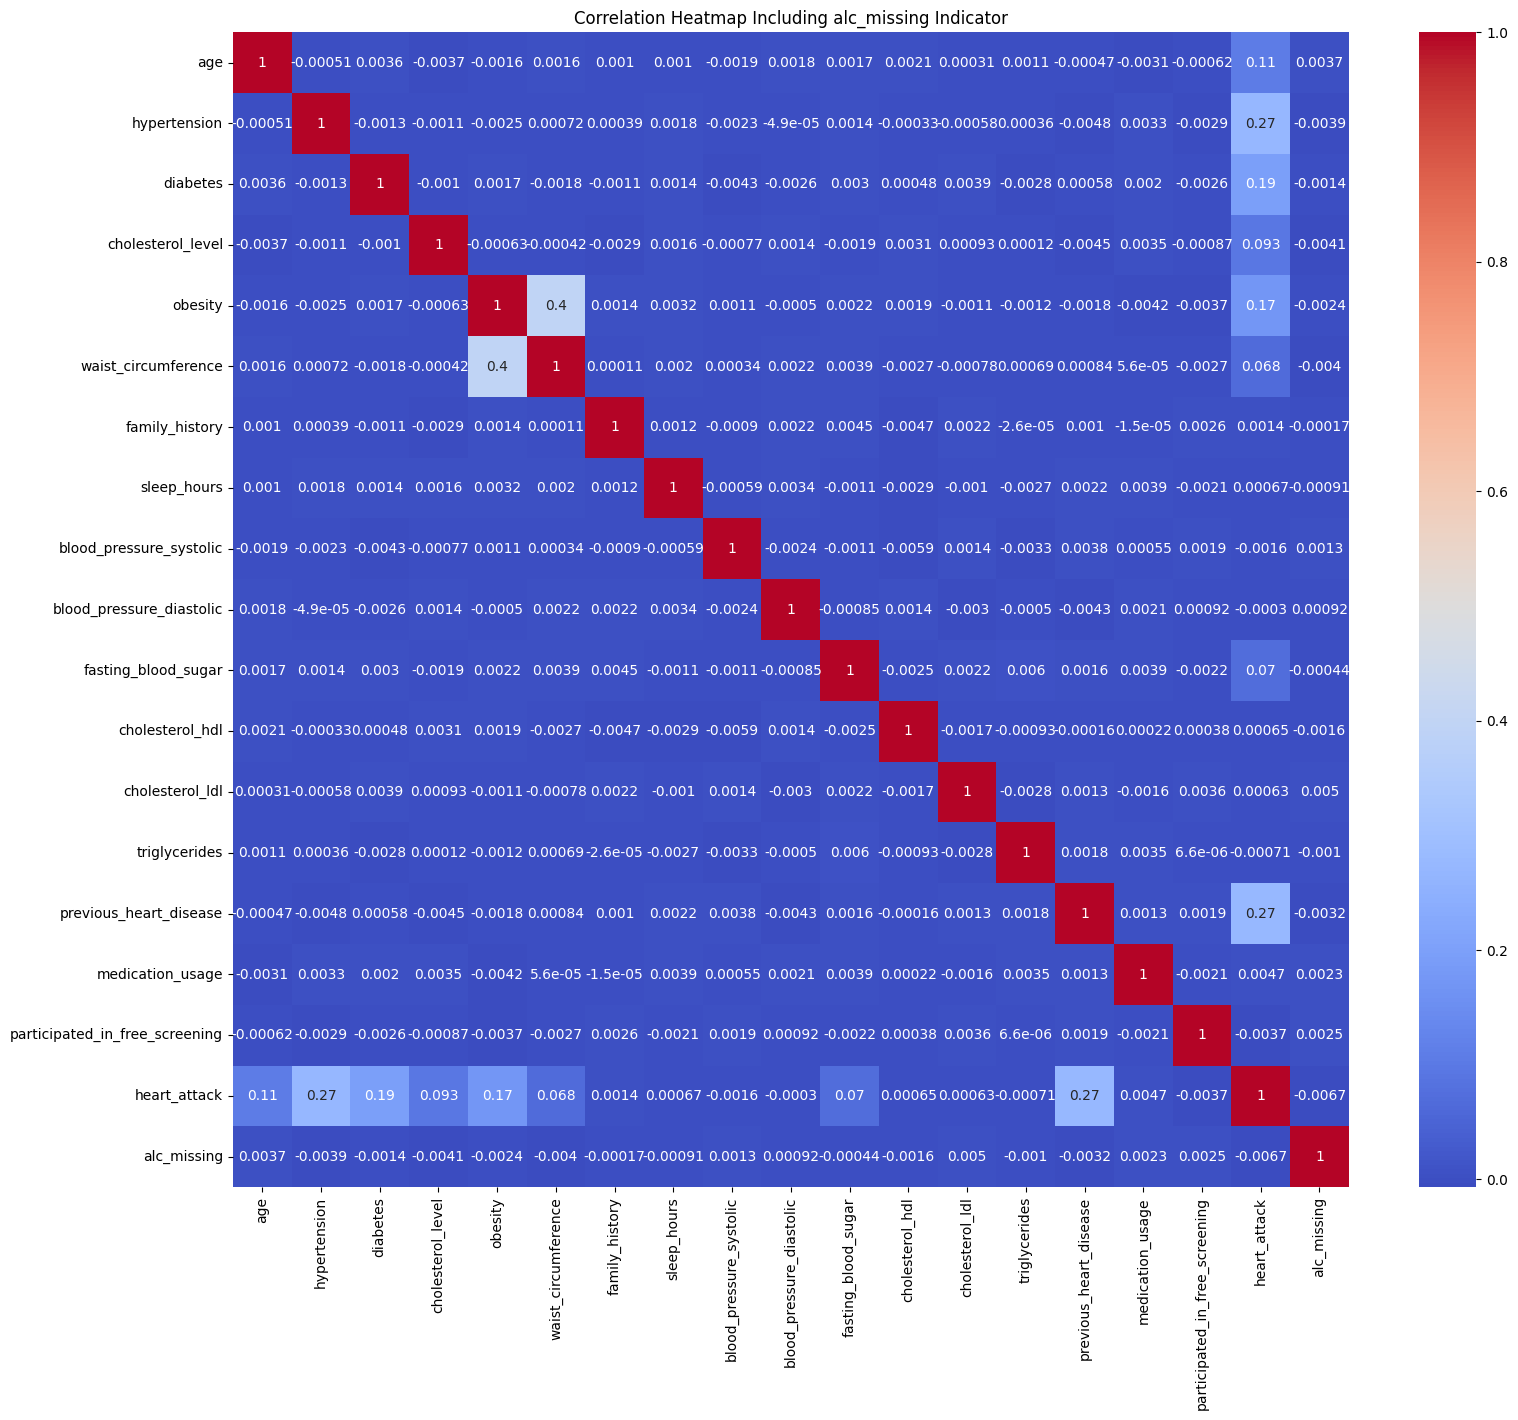

In [8]:
df['alc_missing'] = df['alcohol_consumption'].isnull()
print("Count of missing alcohol_consumption:", df['alc_missing'].sum())
print("Count of non-missing alcohol_consumption:", (~df['alc_missing']).sum())
grouped = df.groupby('alc_missing').agg({
    'age': ['mean','median'],
    'income_level': lambda x: x.mode()[0],
    'hypertension': 'mean',
    'diabetes': 'mean',
    'cholesterol_level': 'mean',
    'heart_attack': 'mean'
})
print("Group summary (missing vs non-missing alcohol_consumption):")
print(grouped)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='alc_missing', kde=True, multiple='stack')
plt.title("Age Distribution by Alcohol Consumption Missingness")
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='gender', hue='alc_missing')
plt.title("Gender Counts by Alcohol Consumption Missingness")
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='region', hue='alc_missing')
plt.title("Region Counts by Alcohol Consumption Missingness")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='alc_missing', y='cholesterol_level')
plt.title("Cholesterol Level by Alcohol Consumption Missingness")
plt.show()
corr = df.copy()
corr['alc_missing'] = corr['alc_missing'].astype(int)
numeric_cols = corr.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(18, 15))
sns.heatmap(corr[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Including alc_missing Indicator")
plt.show()

1. Jumlah missing vs non-missing
Missing: 94,848
Non-missing: 63,507
--> orang yang tidak mengisi alcohol jauh lebih banyak, namun hal ini umum di dataset indonesia, tidak mempengaruhi analisis yang akan dilakukan

2. Perbandingan umur
Missing mean age: 54.58  
Non-missing mean age: 54.48
--> perbandingan hampir sama, tidak ada bias, dan missing banyak di kelompok tertentu

3. Income level
tidak ada perbedaan signifikan, terjadi level yang sama

4. Hypertension hampir sama
5. Diabetes hampir sama
6. Cholesterol sama
7. Heart Attack rate hampir sama

Kesimpulan
Misiing alcohol tidak terhubung dengan variabel kesehatan dan juga tidak terhubung dengan outcome heart attack

In [9]:
# ubah nan menjadi unknown saja biar mudah

df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Unknown')

In [10]:
df.shape

(158355, 29)

In [11]:
df.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info

<bound method DataFrame.info of         age  gender region income_level  hypertension  diabetes  \
0        60    Male  Rural       Middle             0         1   
1        53  Female  Urban          Low             0         0   
2        62  Female  Urban          Low             0         0   
3        73    Male  Urban          Low             1         0   
4        52    Male  Urban       Middle             1         0   
...     ...     ...    ...          ...           ...       ...   
158350   60  Female  Rural       Middle             0         0   
158351   64  Female  Urban          Low             0         0   
158352   30    Male  Urban       Middle             0         0   
158353   74    Male  Urban       Middle             0         0   
158354   61    Male  Urban       Middle             0         0   

        cholesterol_level  obesity  waist_circumference  family_history  ...  \
0                     211        0                   83               0  ...   
1  

In [13]:
df.dtypes

age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                       int64
EKG_results                       

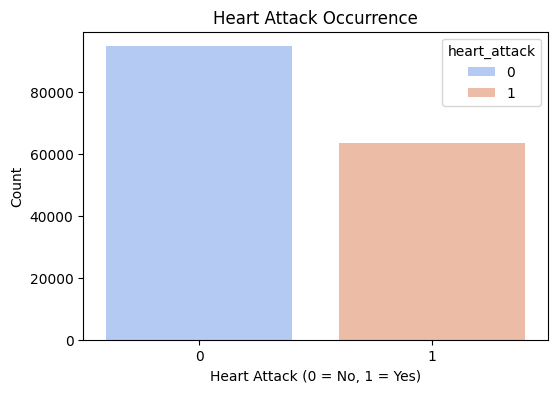

In [15]:
# Distribution of target variable (heart attack cases)
plt.figure(figsize=(6,4))
sns.countplot(x='heart_attack', data=df, palette='coolwarm', hue='heart_attack')
plt.title("Heart Attack Occurrence")
plt.xlabel("Heart Attack (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Jadi tidak semua mengalami heart attack. 

In [16]:
print("\nTarget variable distribution:")
print(df['heart_attack'].value_counts())
print(df['heart_attack'].value_counts(normalize=True))


Target variable distribution:
heart_attack
0    94854
1    63501
Name: count, dtype: int64
heart_attack
0    0.598996
1    0.401004
Name: proportion, dtype: float64


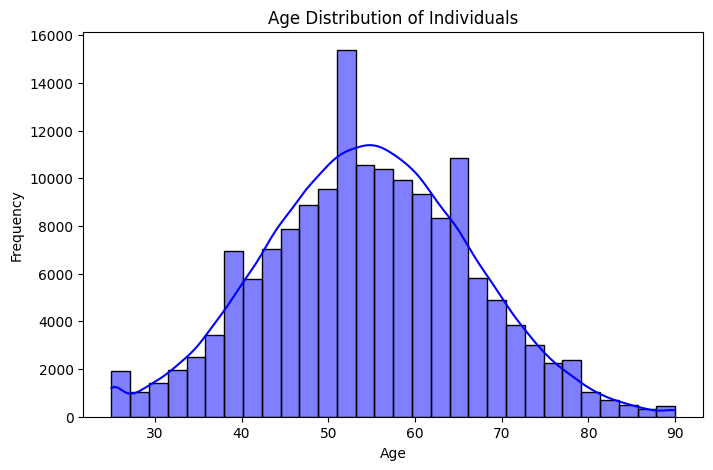

In [17]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


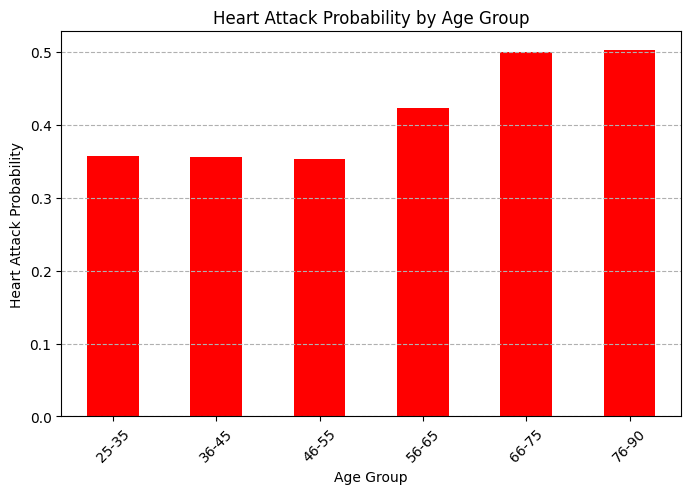

In [19]:
# Heart attack by age group
df['age_group'] = pd.cut(df['age'], bins=[25, 35, 45, 55, 65, 75, 90], labels=["25-35", "36-45", "46-55", "56-65", "66-75", "76-90"])
age_group_counts = df.groupby('age_group', observed=True)['heart_attack'].mean()

plt.figure(figsize=(8,5))
age_group_counts.plot(kind='bar', color='red')
plt.title("Heart Attack Probability by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Attack Probability")
plt.xticks(rotation=45) # Memutar label x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--')
plt.show()


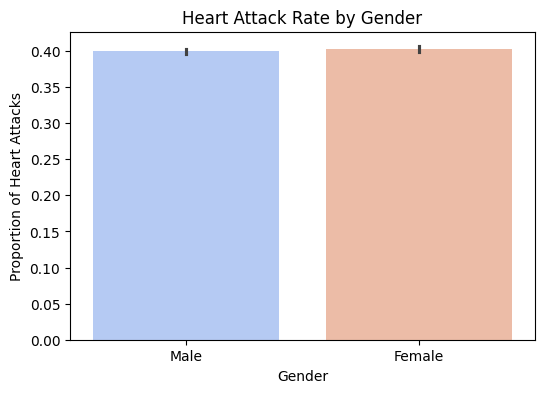

In [20]:
# Gender-based heart attack occurrence
plt.figure(figsize=(6,4))
sns.barplot(x=df['gender'], y=df['heart_attack'], palette='coolwarm', hue=df['gender'] )
plt.title("Heart Attack Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion of Heart Attacks")
plt.show()

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\3963263021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['hypertension'], y=df['heart_attack'], palette='Blues')


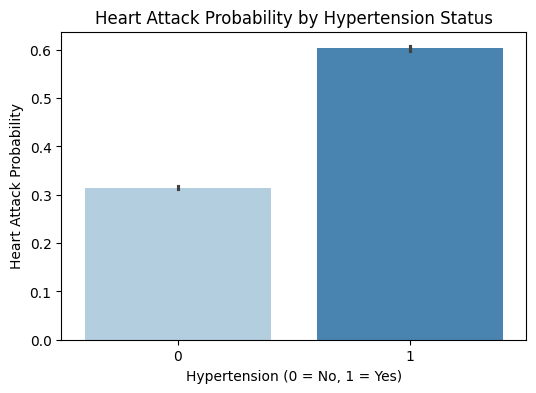

In [14]:
# Hypertension vs Heart Attack
plt.figure(figsize=(6,4))
sns.barplot(x=df['hypertension'], y=df['heart_attack'], palette='Blues')
plt.title("Heart Attack Probability by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Heart Attack Probability")
plt.show()

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\3731895023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['smoking_status'], y=df['heart_attack'], order=['Never', 'Past', 'Current'], palette='OrRd')


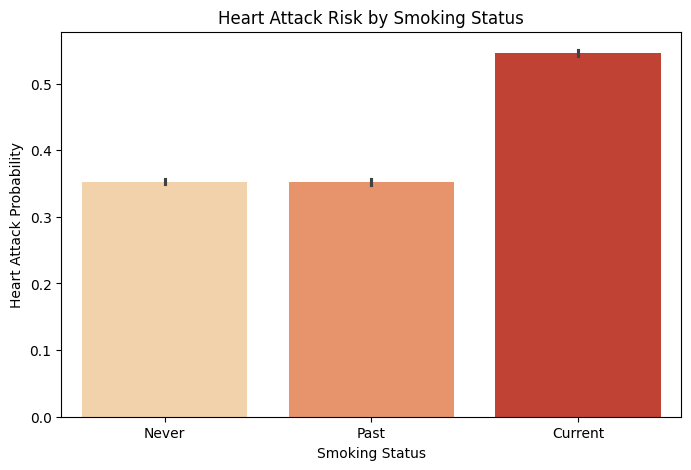

In [15]:
# Smoking status vs Heart Attack
plt.figure(figsize=(8,5))
sns.barplot(x=df['smoking_status'], y=df['heart_attack'], order=['Never', 'Past', 'Current'], palette='OrRd')
plt.title("Heart Attack Risk by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Heart Attack Probability")
plt.show()

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\1680293920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['diabetes'], y=df['heart_attack'], palette='Greens')


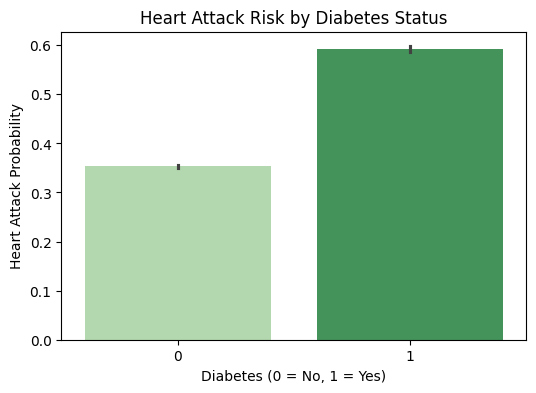

In [16]:
# Diabetes vs Heart Attack
plt.figure(figsize=(6,4))
sns.barplot(x=df['diabetes'], y=df['heart_attack'], palette='Greens')
plt.title("Heart Attack Risk by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Heart Attack Probability")
plt.show()

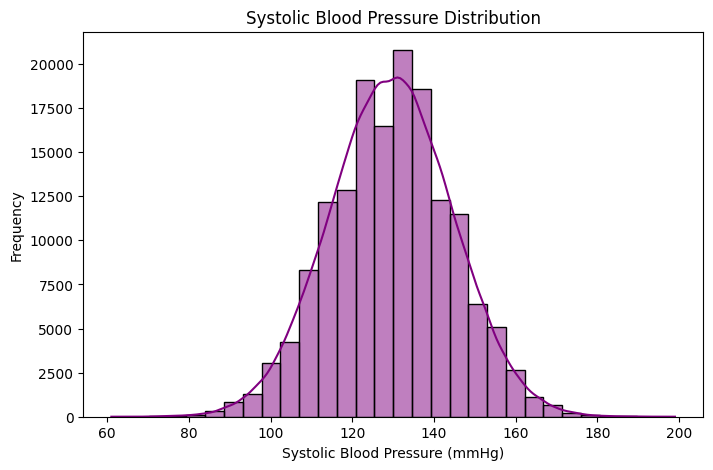

In [17]:
# Blood Pressure Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['blood_pressure_systolic'], bins=30, kde=True, color='purple')
plt.title("Systolic Blood Pressure Distribution")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\2711127479.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


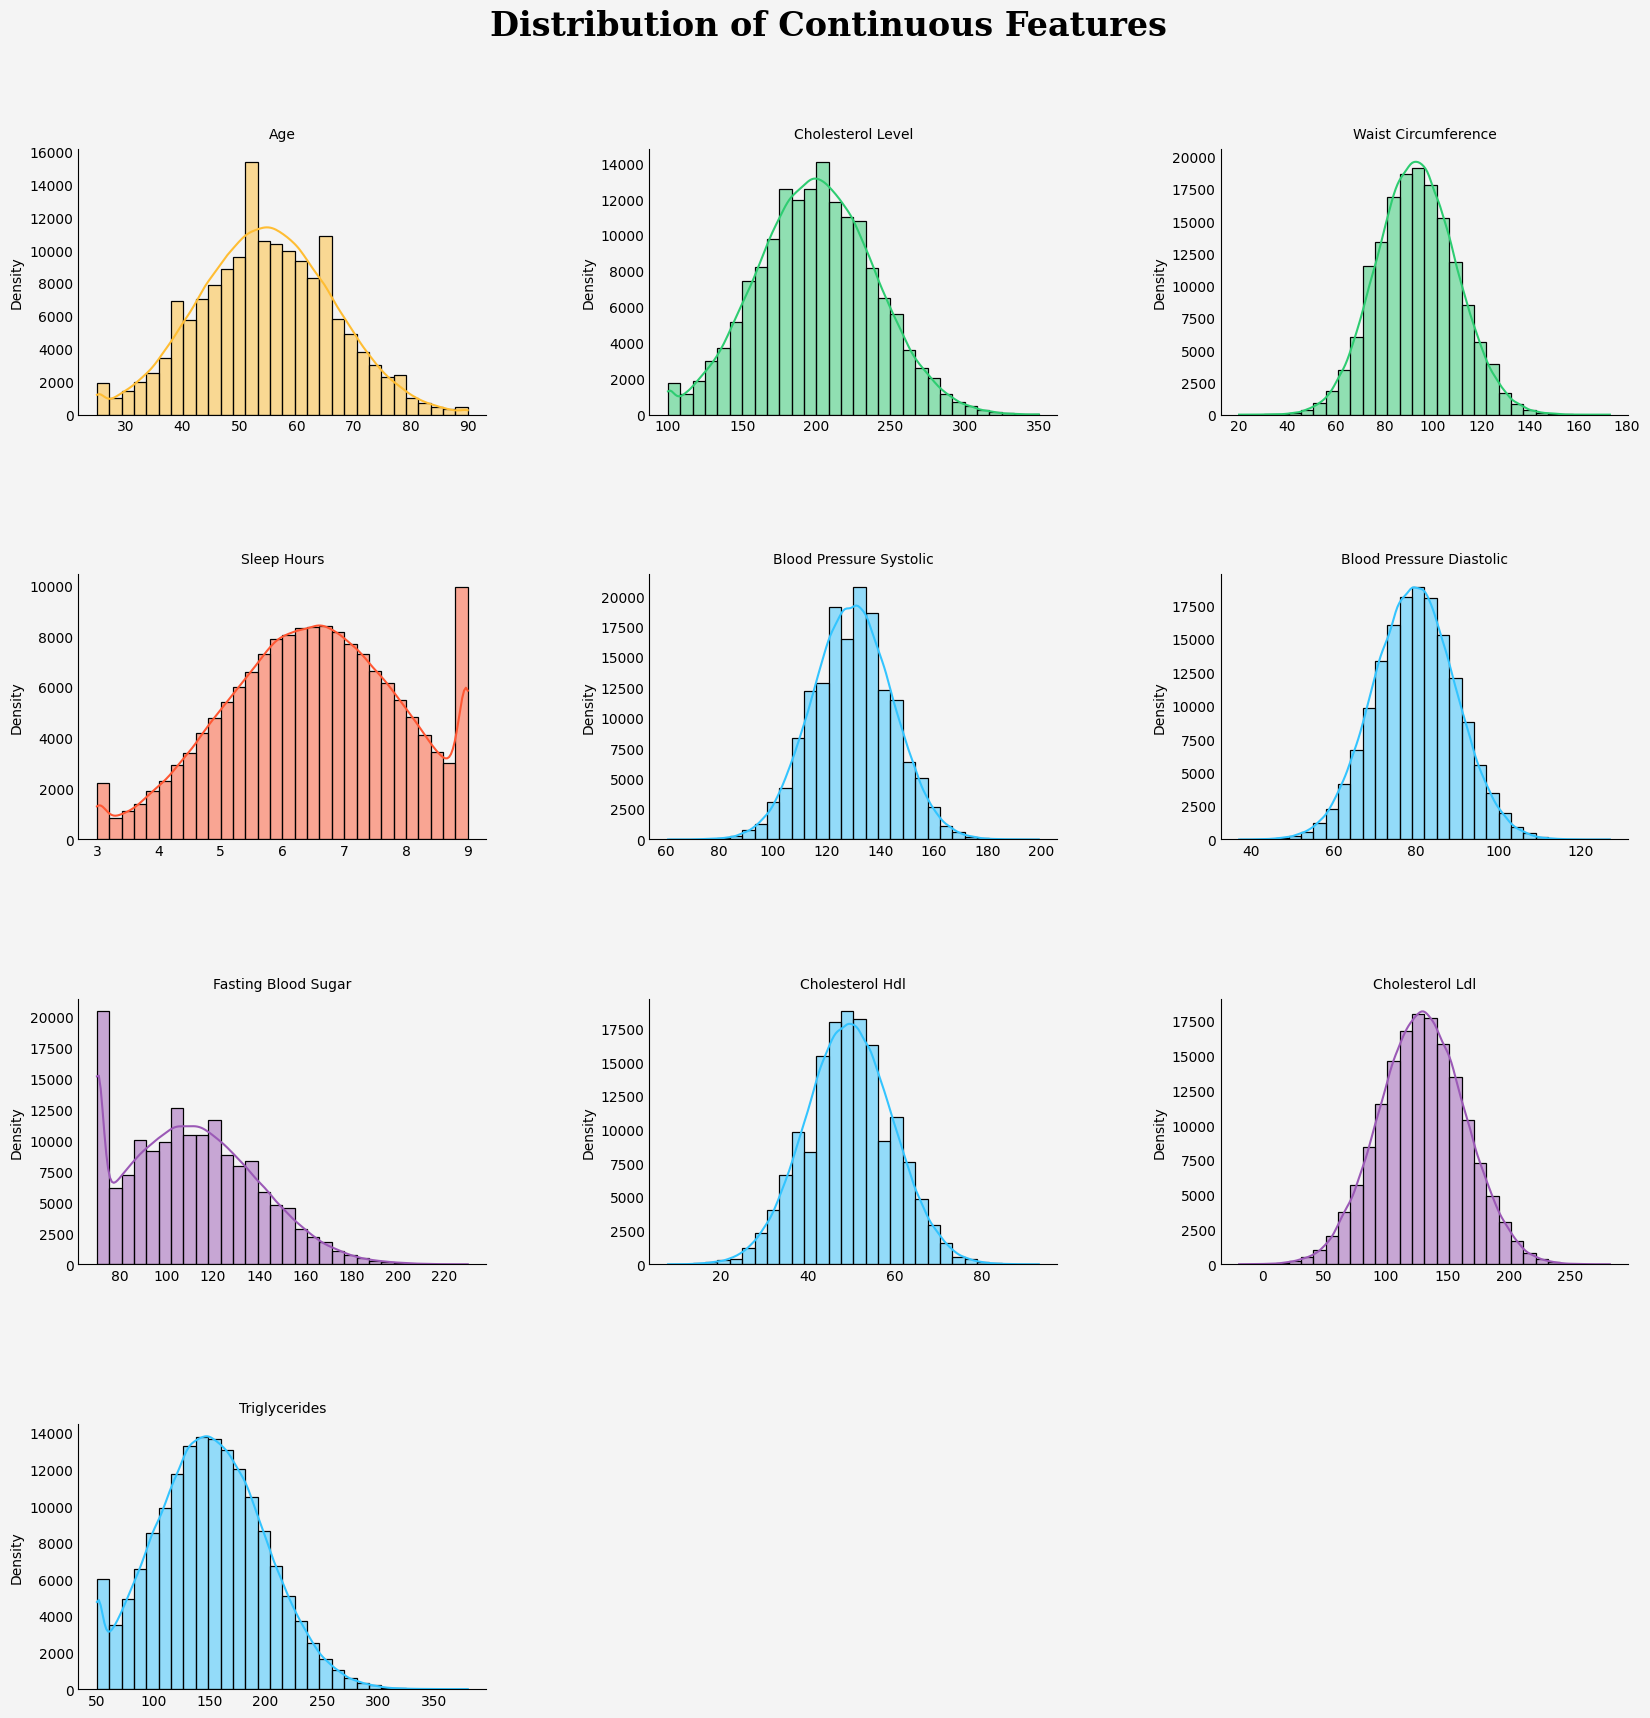

In [24]:
con_cols = [
    'age', 'cholesterol_level', 'waist_circumference', 
    'sleep_hours', 'blood_pressure_systolic', 
    'blood_pressure_diastolic', 'fasting_blood_sugar',
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]
cat_cols = [
    'gender', 'region', 'income_level', 'hypertension', 
    'diabetes', 'obesity', 'family_history', 'smoking_status','alcohol_consumption',
    'alcohol_consumption', 'physical_activity', 'dietary_habits', 
    'air_pollution_exposure', 'stress_level', 'EKG_results', 
    'previous_heart_disease', 'medication_usage', 
    'participated_in_free_screening'
]
target= ['heart_attack']


background_color = "#f4f4f4"  
color_palette = ["#ff5733", "#33c4ff", "#ffbd33", "#9b59b6", "#2ecc71"]

fig = plt.figure(figsize=(20, 20))  
gs = fig.add_gridspec(4, 3)  
gs.update(wspace=0.4, hspace=0.6)

axes = [fig.add_subplot(gs[i//3, i%3]) for i in range(len(con_cols))]

fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)
    for s in ["top","right"]:
        ax.spines[s].set_visible(False)

for ax, feature in zip(axes, con_cols):
    sns.histplot(df[feature], ax=ax, kde=True, bins=30, color=np.random.choice(color_palette), edgecolor='black')
    ax.set_title(feature.replace('_', ' ').title(), fontsize=10, pad=8)
    ax.set_xlabel('')
    ax.set_ylabel('Density')

plt.suptitle('Distribution of Continuous Features', 
             fontsize=24, 
             fontweight='bold',
             fontfamily='serif',
             y=0.95)

plt.tight_layout()
plt.show()

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\2893418443.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette=color_palette, edgecolor='black')
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\2893418443.py:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feature, ax=ax, palette=color_palette, edgecolor='black')
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\2893418443.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=ax, palette=color_palette, edgecolor='black')
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532

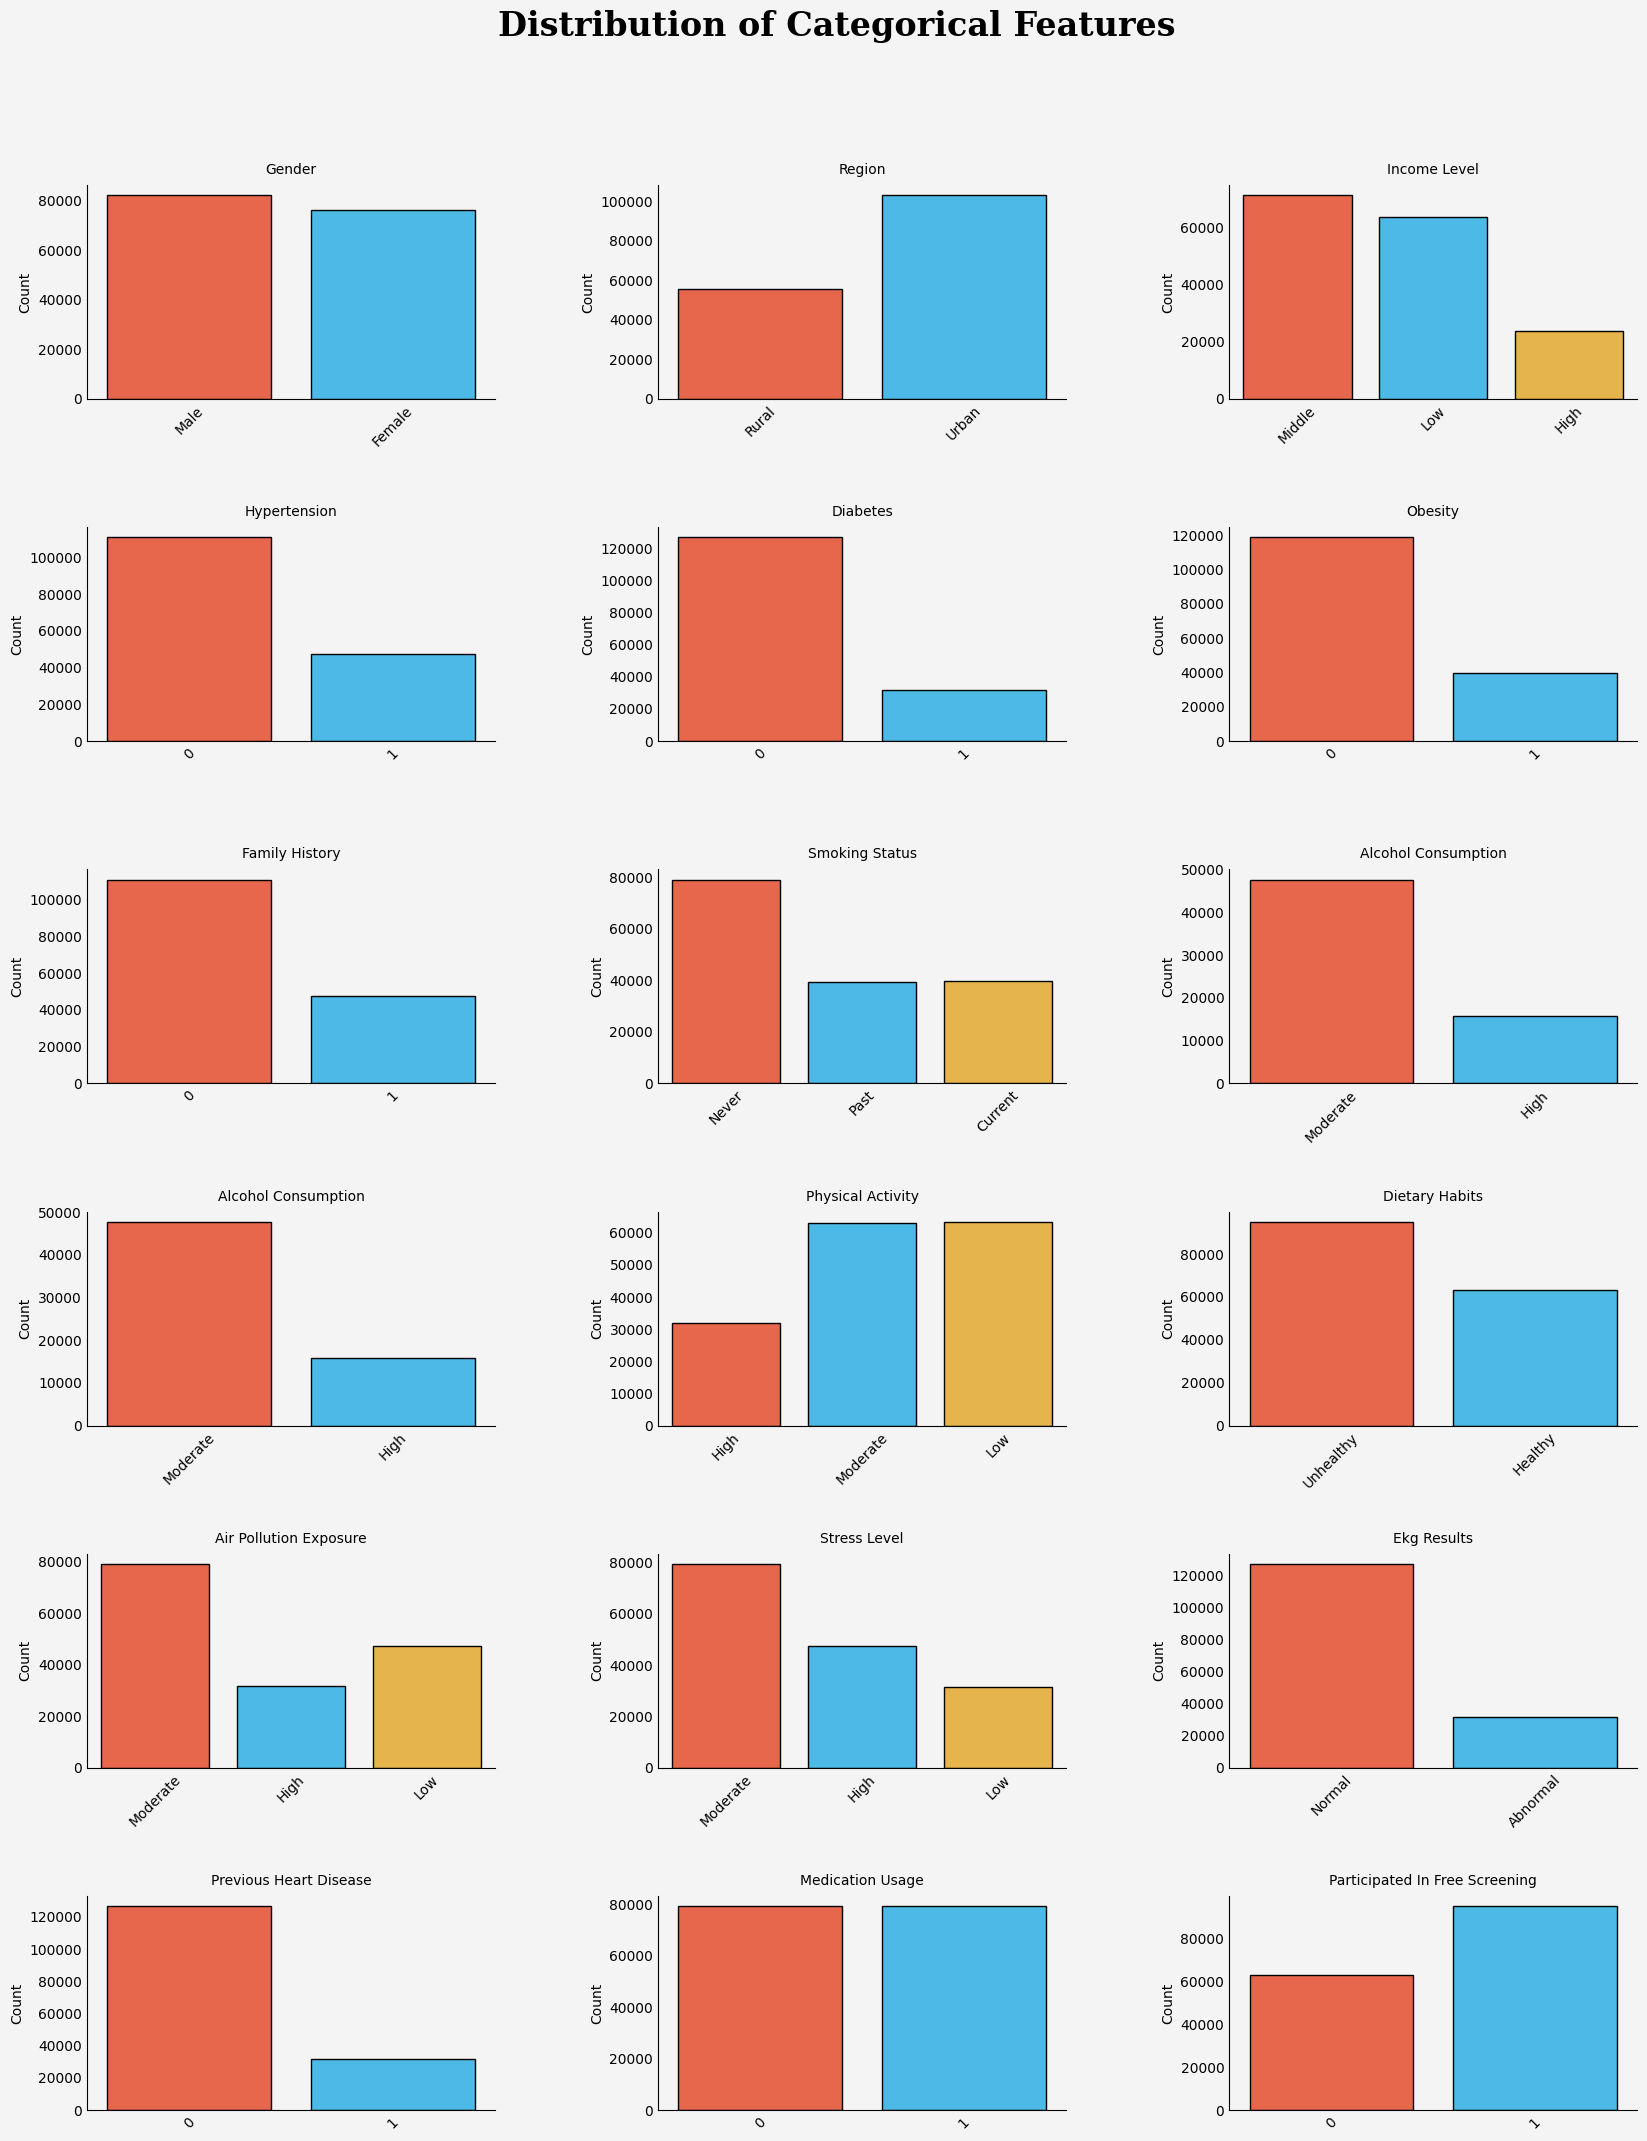

In [25]:
fig = plt.figure(figsize=(20, 25))  
gs = fig.add_gridspec(6, 3) 
gs.update(wspace=0.4, hspace=0.6)

axes = [fig.add_subplot(gs[i//3, i%3]) for i in range(len(cat_cols))]

fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)

for ax, feature in zip(axes, cat_cols):
    sns.countplot(data=df, x=feature, ax=ax, palette=color_palette, edgecolor='black')
    ax.set_title(feature.replace('_', ' ').title(), fontsize=10, pad=8)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Distribution of Categorical Features', 
             fontsize=24, 
             fontweight='bold',
             fontfamily='serif',
             y=0.95)

plt.tight_layout()
plt.show()

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\4132687655.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='heart_attack', y=feature, ax=ax, palette=color_palette)
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\4132687655.py:15: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='heart_attack', y=feature, ax=ax, palette=color_palette)
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\4132687655.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='heart_attack', y=feature, ax=ax, palette=color_palette)
C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\41326876

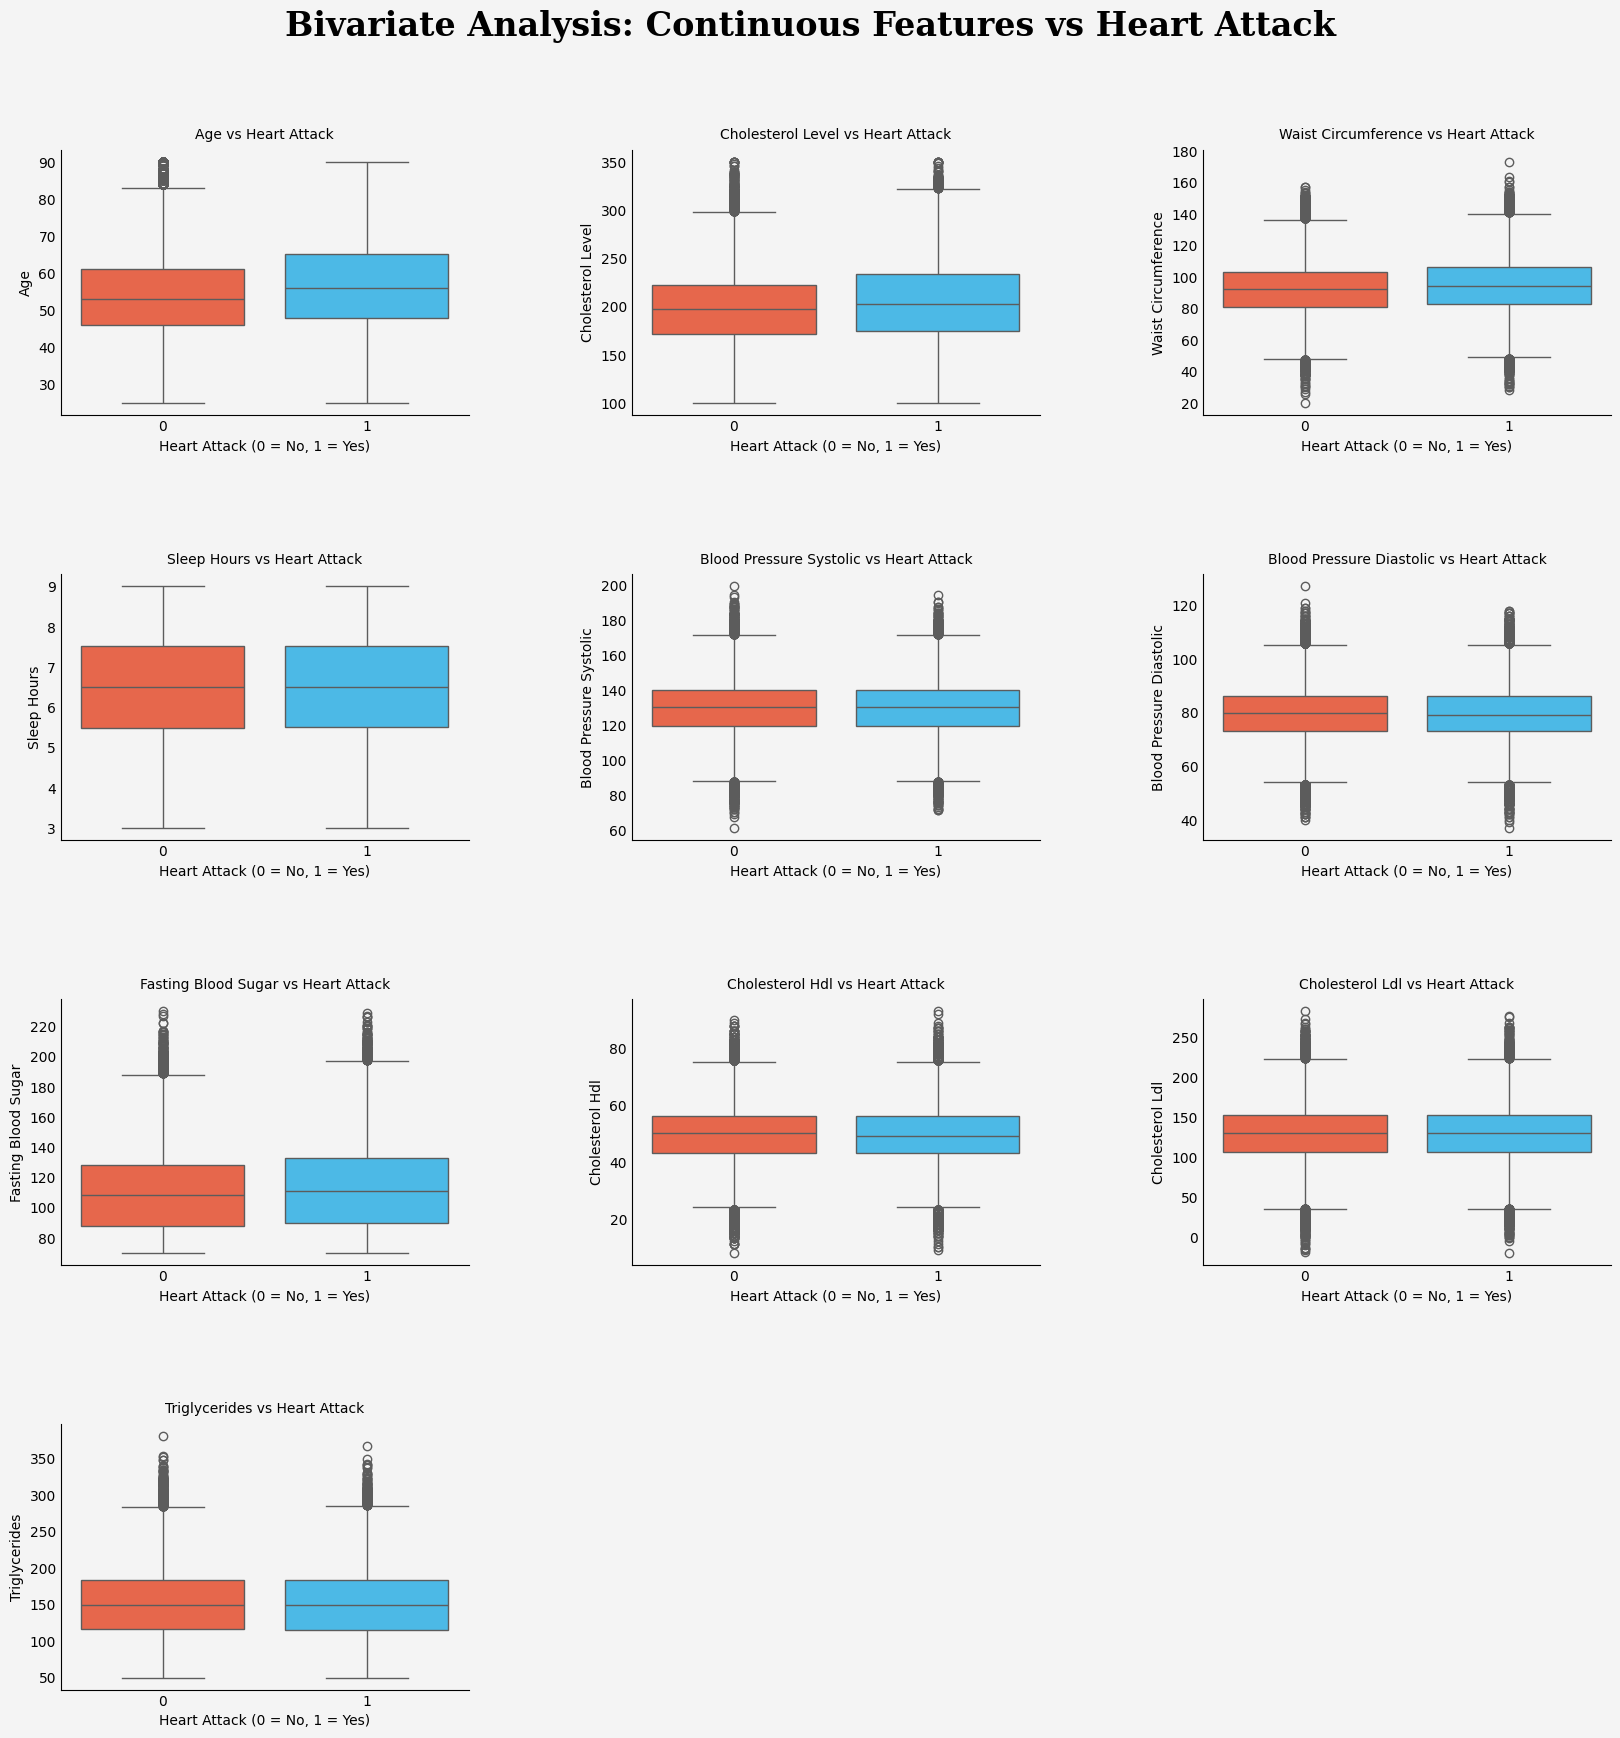

In [26]:
fig = plt.figure(figsize=(20, 20))  
gs = fig.add_gridspec(4, 3)  
gs.update(wspace=0.4, hspace=0.6)

axes = [fig.add_subplot(gs[i//3, i%3]) for i in range(len(con_cols))]

fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)

for ax, feature in zip(axes, con_cols):
    sns.boxplot(data=df, x='heart_attack', y=feature, ax=ax, palette=color_palette)
    ax.set_title(f"{feature.replace('_', ' ').title()} vs Heart Attack", fontsize=10, pad=8)
    ax.set_xlabel('Heart Attack (0 = No, 1 = Yes)')
    ax.set_ylabel(feature.replace('_', ' ').title())

plt.suptitle('Bivariate Analysis: Continuous Features vs Heart Attack', 
             fontsize=24, 
             fontweight='bold',
             fontfamily='serif',
             y=0.95)

plt.tight_layout()
plt.show()

C:\Users\Talitha Sukma\AppData\Local\Temp\ipykernel_19532\154392260.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


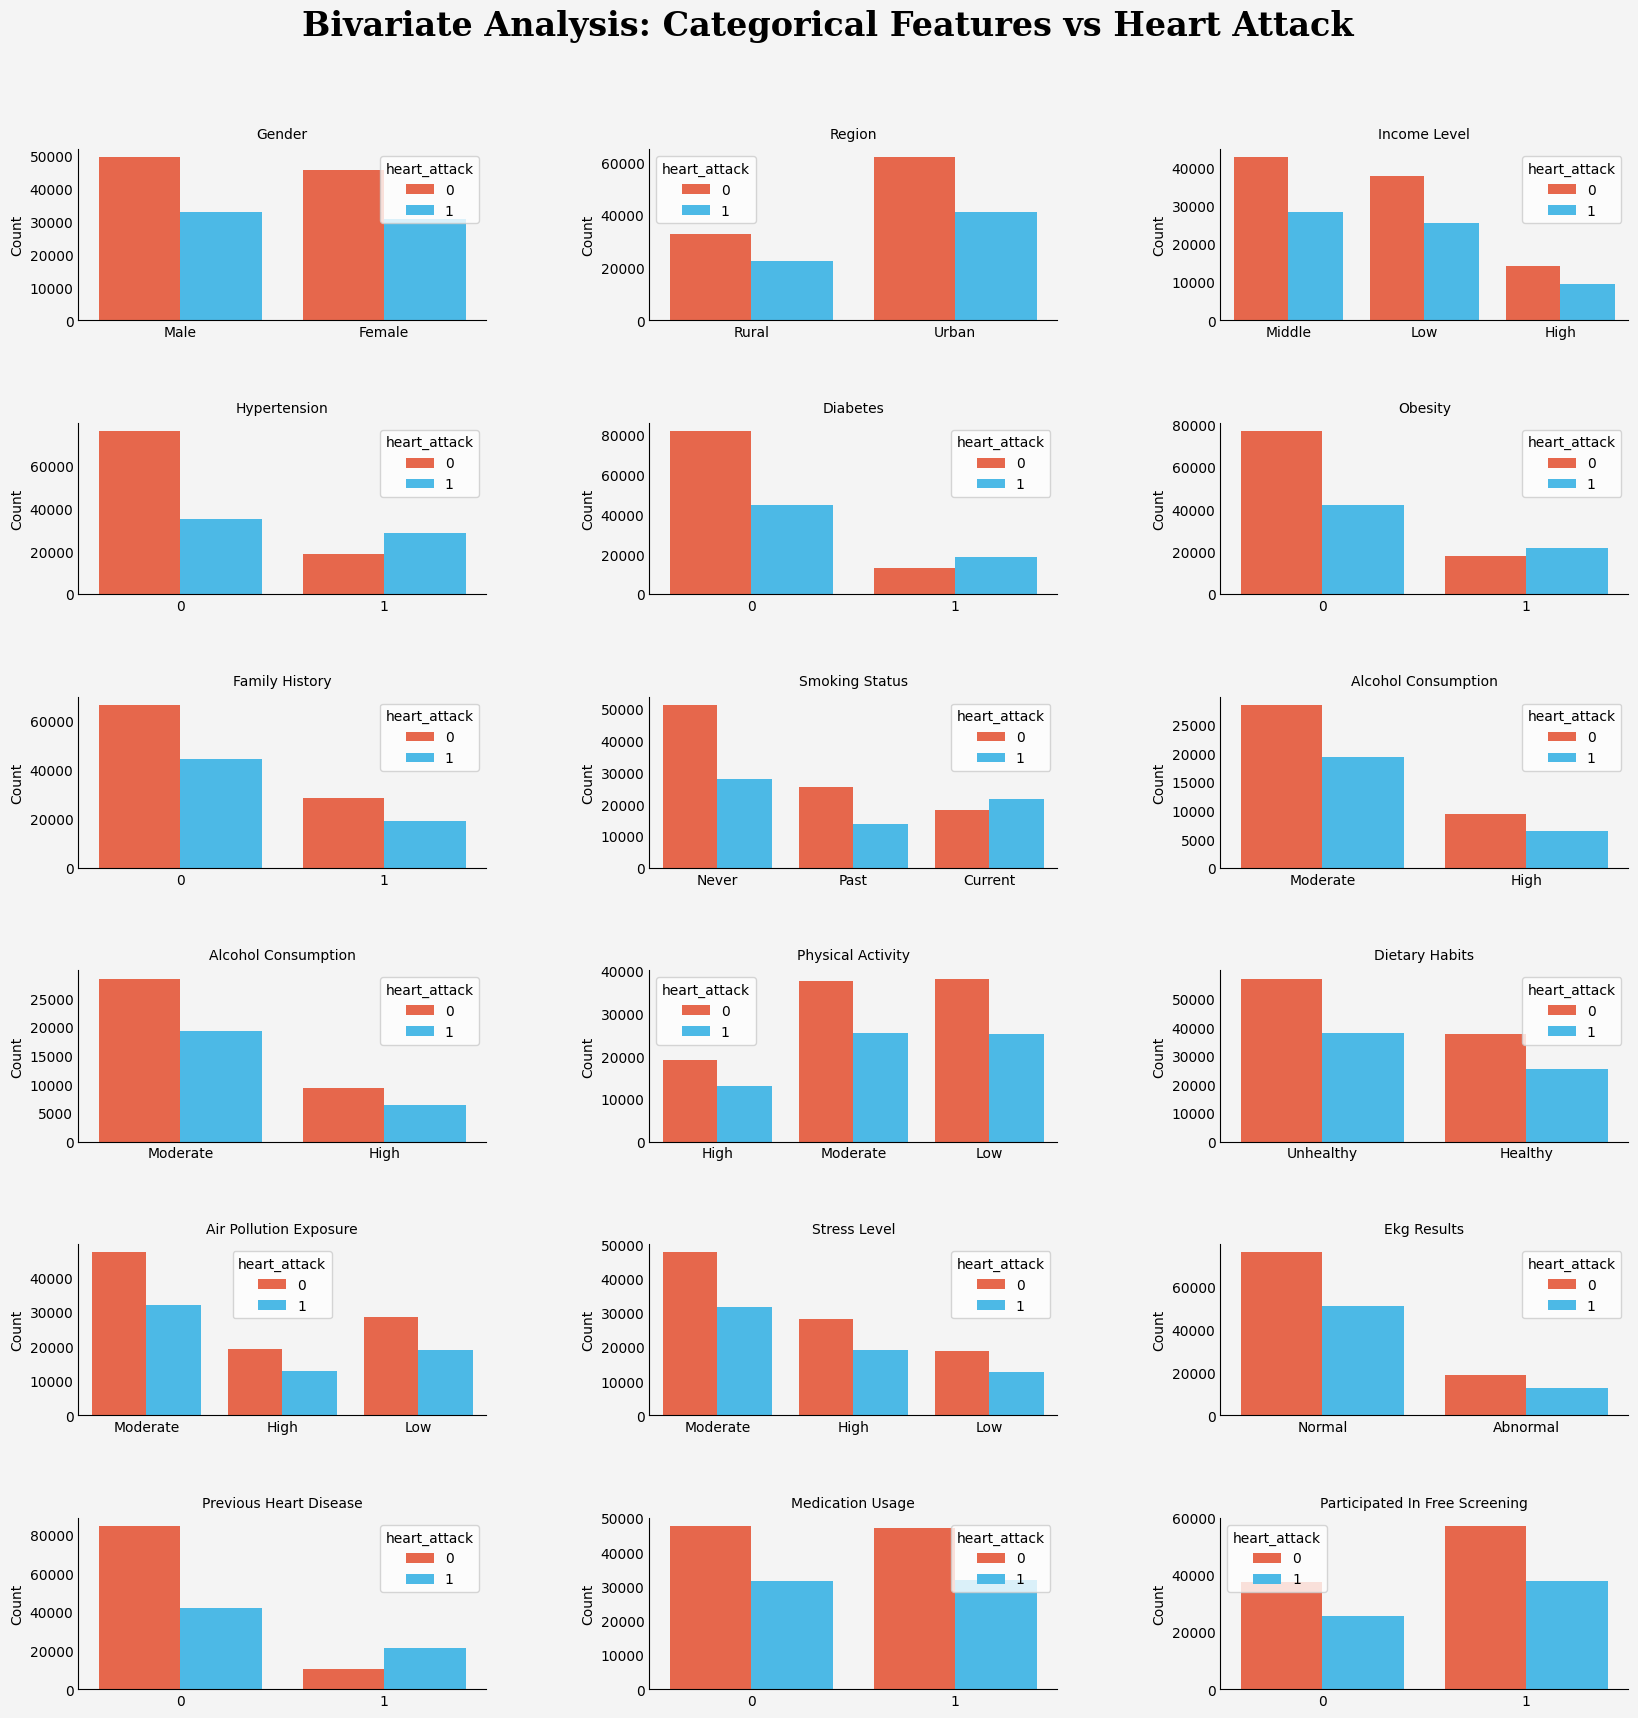

In [27]:
fig = plt.figure(figsize=(20, 20))  
gs = fig.add_gridspec(6, 3)  
gs.update(wspace=0.4, hspace=0.6)

axes = [fig.add_subplot(gs[i//3, i%3]) for i in range(len(cat_cols))]

background_color = "#f4f4f4"
color_palette = ["#ff5733", "#33c4ff"] 

fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)

for ax, feature in zip(axes, cat_cols):
    sns.countplot(data=df, x=feature, hue='heart_attack', ax=ax, palette=color_palette)
    ax.set_title(feature.replace('_', ' ').title(), fontsize=10, pad=8)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    if len(df[feature].unique()) > 3:
        ax.tick_params(axis='x', rotation=45)

plt.suptitle('Bivariate Analysis: Categorical Features vs Heart Attack', 
             fontsize=24, 
             fontweight='bold',
             fontfamily='serif',
             y=0.95)

plt.tight_layout()
plt.show()

In [30]:
df_stats = df[con_cols].describe().T
df_stats["skewness"] = df[con_cols].skew()
df_stats["kurtosis"] = df[con_cols].kurtosis()

print(df_stats.to_string())


                             count        mean        std    min         25%         50%        75%    max  skewness  kurtosis
age                       158355.0   54.543778  11.910897   25.0   46.000000   55.000000   63.00000   90.0  0.032727 -0.177115
cholesterol_level         158355.0  199.533264  39.737565  100.0  172.000000  199.000000  226.00000  350.0  0.040634 -0.136397
waist_circumference       158355.0   93.268504  16.382205   20.0   82.000000   93.000000  104.00000  173.0  0.063938 -0.010687
sleep_hours               158355.0    6.480064   1.425398    3.0    5.492985    6.507461    7.52064    9.0 -0.165101 -0.536773
blood_pressure_systolic   158355.0  129.515772  15.005641   61.0  119.000000  130.000000  140.00000  199.0 -0.005645  0.009472
blood_pressure_diastolic  158355.0   79.490809  10.002964   37.0   73.000000   80.000000   86.00000  127.0 -0.007423 -0.006479
fasting_blood_sugar       158355.0  110.736762  27.673445   70.0   89.000000  109.000000  130.00000  230.0  0.3